In [57]:
import numpy as np
import pandas as pd

In [58]:
dir_data = "../data/alpha3/"
filename = dir_data+"function_phi_alpha3_dataframe.csv"

In [59]:
import decimal as dc
dc.getcontext().rounding = dc.ROUND_DOWN

def phi_value_alpha_3(df_data,xi,p):
    """
    df_data : pandas DataFrame
    xi      :
    p       : probablity
    """
    
    p_0 = float(round(dc.Decimal(p),2))
    p_1 = float(round(dc.Decimal(p_0+0.01),2))
    del_p = abs(p-p_0)
    
    if del_p <= 1e-9:
        col_name = 'p={:.2f}'.format(p_0)
        phi_list = df_data[col_name].values
    
    else:
        col_name0 = 'p={:.2f}'.format(p_0)
        phi_list0 = df_data[col_name0].values
    
        col_name1 = 'p={:.2f}'.format(p_1)
        phi_list1 = df_data[col_name1].values
        
        del_phi_list =  (phi_list1 - phi_list0)*del_p/0.01
        phi_list = phi_list0 + del_phi_list
    
    xi_list = df_data['xi'].values
    if xi > 2:
        phi_value = 0
    elif xi in xi_list:
        index = list(xi_list).index(xi)
        phi_value = phi_list[index] 
    else:
        index0 = int(xi//0.0002)
        index1 = int(index0+1)
        del_xi = xi%0.0002
        phi_0 = phi_list[index0]
        phi_1 = phi_list[index1]
        del_phi = (phi_1-phi_0)*del_xi/0.0002
        phi_value = phi_0 + del_phi

    return phi_value

def phi_list_alpha_3(df_data,xi_list,p):
    phi_list = []
    for xi in xi_list:
        phi_value = phi_value_alpha_3(df_data,xi,p)
        phi_list.append(phi_value) 

    return np.array(phi_list) 

In [60]:
xi_list = np.linspace(0,2,700)
p = 0.996
df_temp = pd.read_csv(filename)
density = phi_list_alpha_3(df_temp,xi_list,p)

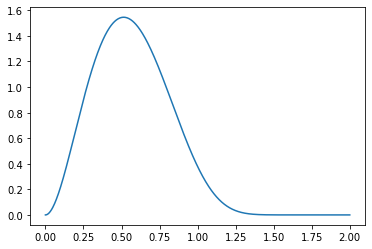

In [61]:
from matplotlib import pyplot as plt
plt.plot(xi_list,density)